# 1. Defining the Question

## 1.1 Specifying the Data Analysis Question
Create a credit scoring model to predict whether a new customer will default based on the historical data in the given dataset. Select one or several suitable learning algorithms and a suitable metric for assessing quality model.

## 1.2 Defining the Metric for Success
Since the problem we are tackling is a classification problem, we will use classification reports and confusion matrices as well as accuracy and precision scores to measure the success of the models used.

## 1.3 Understanding the Context
Tala is a finance app that offers microloans to its users in Kenya, Philippines and Tanzania. It uses a variety of information, from basic biographical data to the loan applications that come through daily. 
You work with the product team as a data scientist to help create effective credit scoring models used to assess different customer segments.

## 1.4 Recording the Experimental Design
- load libraries and dataset
- clean dataset:
    - deal with duplicate and/or missing values
    - deal with outliers, where necessary
    - deal with other anomalies in the data, where necessary
- carry out exploratory data analysis
- carry out feature engineering
- carry out modeling
    - tune hyperparameters
    - feature selection
    - alternative models
- summarize and provide recommendations
- challenge the solution

## 1.5 Assessing the Relevance of the Data
While the data provided was relevant, it had a lot of imbalanced classes which affected the results of the modeling.

# 2. Data Preparation

In [1]:
# load Numpy
import numpy as np

# load Pandas
import pandas as pd

# load matplotlib.pyplot
import matplotlib.pyplot as plt

# load Seaborn
import seaborn as sns

# customizing display settings
%matplotlib inline
pd.set_option("display.max.columns", None)

from pylab import rcParams
rcParams["figure.figsize"] = [7, 5]

In [2]:
# load the train dataset
train_df=pd.read_csv('tala_train.csv')

# preview the first 5 records
train_df.head(10)

,id,application_dt,education_cd,gender_cd,age,car_own_flg,car_type_flg,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,Air_flg,default_flg
0,1,01JAN2014,SCH,M,27,Y,Y,0,0,-1.917831,0,40,2,3,32000,1,4,N,0
1,2,01JAN2014,GRD,F,26,N,N,0,0,-1.153144,2,60,2,3,50000,2,1,N,0
2,3,01JAN2014,SCH,M,35,N,N,0,1,-1.732810,0,40,1,2,20000,4,3,N,0
3,4,01JAN2014,GRD,F,35,N,N,0,1,-2.552133,2,20,2,3,80000,1,3,N,0
4,5,01JAN2014,UGR,F,24,N,N,0,0,-1.914581,1,50,2,3,27000,1,2,N,0
5,6,01JAN2014,SCH,M,35,Y,Y,0,0,-1.920823,4,40,2,3,35000,4,3,N,0
6,7,01JAN2014,UGR,F,35,N,N,0,0,-1.990167,6,60,1,1,20000,1,3,N,0
7,8,01JAN2014,SCH,M,55,Y,N,0,0,-1.733450,1,40,2,3,8000,1,3,N,1
8,9,01JAN2014,GRD,M,34,Y,Y,0,0,-1.998422,2,50,1,1,30000,1,4,Y,0
9,10,01JAN2014,GRD,F,42,N,N,0,0,-1.949733,3,40,1,2,60000,3,3,N,0


In [3]:
# check dataset shape
train_df.shape

(110148, 19)

**Observation**: There  dimensions/records are (110148, 19) rows and columns.

In [4]:
# check for duplicated values
train_df.duplicated().any()

False

In [5]:
# check for missing values
train_df.isna().sum()

id                   0
application_dt       0
education_cd       478
gender_cd            0
age                  0
car_own_flg          0
car_type_flg         0
appl_rej_cnt         0
good_work_flg        0
Score_bki            0
out_request_cnt      0
region_rating        0
home_address_cd      0
work_address_cd      0
income               0
SNA                  0
first_time_cd        0
Air_flg              0
default_flg          0
dtype: int64

**Observations:** There are 478 missing  values in education_cd column

The 'education_cd' variable has 478 missing values. As it is a categorical variable about the level of education attained, we will replace these missing values with the string 'N/A'.

In [6]:
# replace the missing values with 'N/A'
train_df['education_cd'] = train_df.education_cd.fillna('N/A')

# confirm that we don't have any more missing values
train_df.isna().sum()

id                 0
application_dt     0
education_cd       0
gender_cd          0
age                0
car_own_flg        0
car_type_flg       0
appl_rej_cnt       0
good_work_flg      0
Score_bki          0
out_request_cnt    0
region_rating      0
home_address_cd    0
work_address_cd    0
income             0
SNA                0
first_time_cd      0
Air_flg            0
default_flg        0
dtype: int64

In [7]:
# check the data types
train_df.dtypes

id                   int64
application_dt      object
education_cd        object
gender_cd           object
age                  int64
car_own_flg         object
car_type_flg        object
appl_rej_cnt         int64
good_work_flg        int64
Score_bki          float64
out_request_cnt      int64
region_rating        int64
home_address_cd      int64
work_address_cd      int64
income               int64
SNA                  int64
first_time_cd        int64
Air_flg             object
default_flg          int64
dtype: object

We should split the 'application_dt' variable into day and month.

In [8]:
train_df['application_dt'] =  train_df['application_dt'].apply(lambda x : '%s %s %s' % (x[0:2], x[2:5], x[5:]))
train_df[['application_day', 'application_month', 'year']] = train_df['application_dt'].str.split(" ", 2, expand = True)

# rearrange columns
cols = train_df.columns.to_list()
cols.insert(0, 'application_day')
cols.insert(1, 'application_month')

# drop unnecessary columns
train_df.drop(columns = ['application_dt', 'year', ], inplace = True)
cols.remove('application_dt')
cols.remove('year')
cols = cols[:-2]

# rearrange columns
train_df = train_df[cols]
train_df.head()

,application_day,application_month,id,education_cd,gender_cd,age,car_own_flg,car_type_flg,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,Air_flg,default_flg
0,01,JAN,1,SCH,M,27,Y,Y,0,0,-1.917831,0,40,2,3,32000,1,4,N,0
1,01,JAN,2,GRD,F,26,N,N,0,0,-1.153144,2,60,2,3,50000,2,1,N,0
2,01,JAN,3,SCH,M,35,N,N,0,1,-1.732810,0,40,1,2,20000,4,3,N,0
3,01,JAN,4,GRD,F,35,N,N,0,1,-2.552133,2,20,2,3,80000,1,3,N,0
4,01,JAN,5,UGR,F,24,N,N,0,0,-1.914581,1,50,2,3,27000,1,2,N,0


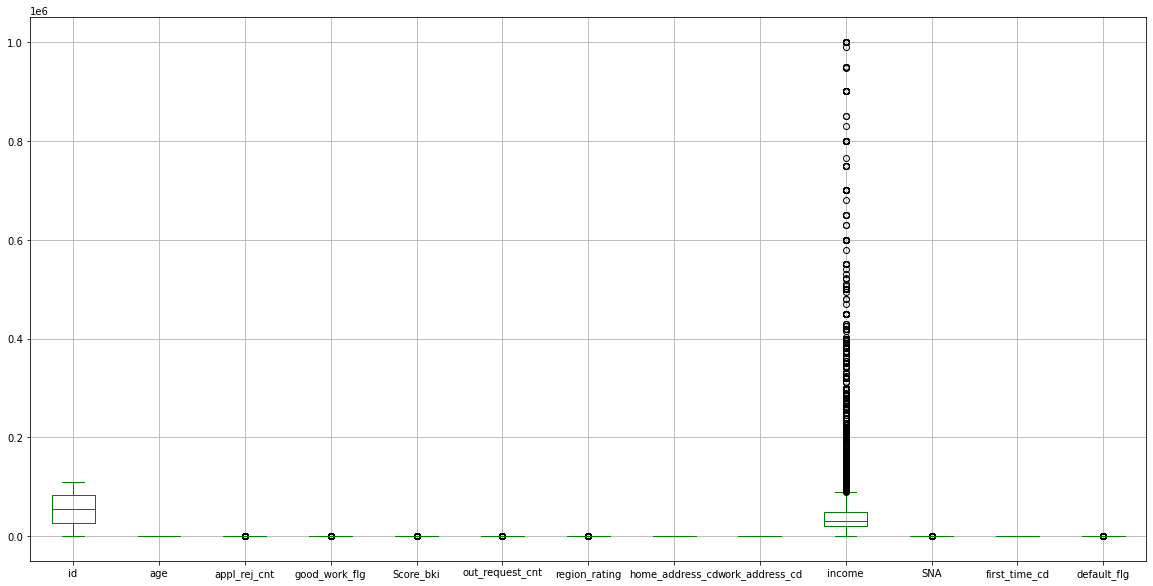

In [9]:
##### checking for outliers
plt.figure(figsize=(20,10))
train_df.boxplot(color='green',fontsize=10)
plt.show()

**Observations**: There are outliers in income variable in dataset of which we can treat.usually an outlier is: ( **1.5 * Interquartile Range**)

We see that the 'income' variable has a lot of outliers. However, we cannot remove them because they reflect real life income earnings, and therefore provide useful insights. However, it is worth keeping in mind that logistic regression assumes that the dataset it will be fitted on has few to no outliers.

We are now done with data cleaning and preparation, and can now move on to the exploratory data analysis stage.

# 3. Exploratory Data Analysis

## 3.1 Univariate Analysis

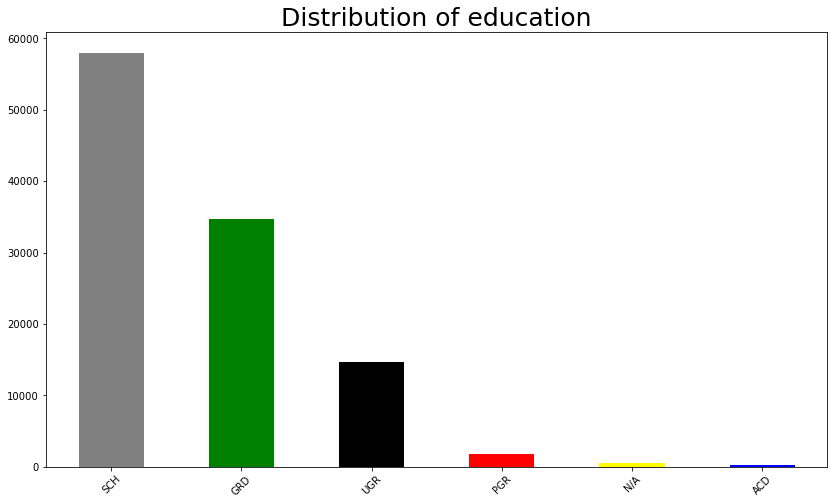

In [10]:
# distribution of education
plt.figure(figsize=(14,8))
plt.title('Distribution of education',fontsize=25)
train_df['education_cd'].value_counts().plot(kind='bar',rot=45,color={'black','green','yellow','blue','grey','red'})
plt.show()

**Observations.:** The schooling(SCH) customers account for highest number.

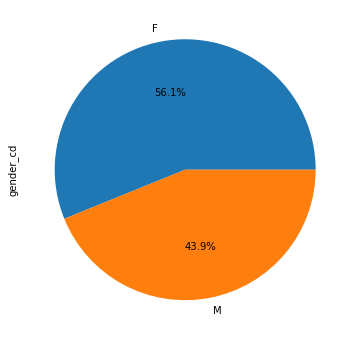

In [11]:
# exploring the 'gender_cd' variable
plt.figure(figsize = (6, 6))
train_df.gender_cd.value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
plt.show()



**Observations**:There are more Females than Males.

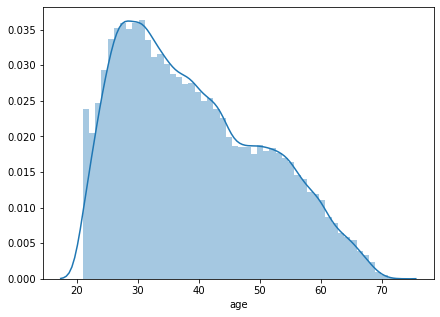

In [12]:
# exploring the 'age variable'
sns.distplot(train_df['age']);

The age distribution of the customers is skewed to the right.

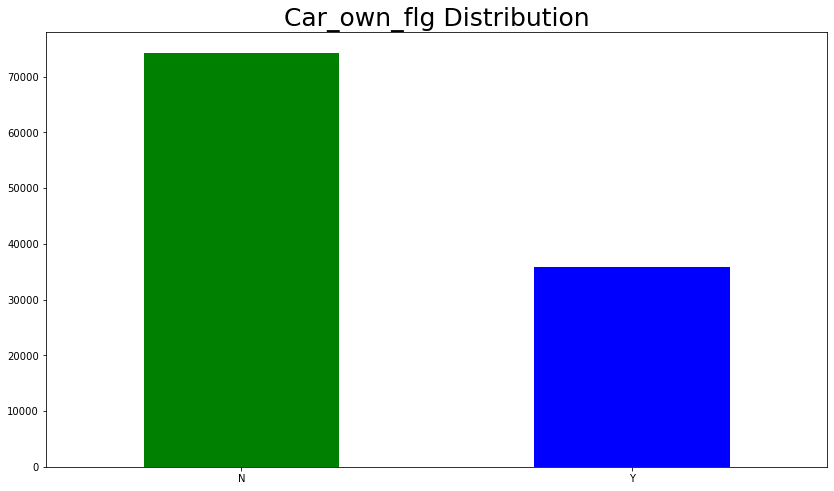

In [13]:
# exploring the 'car_own_flg' variable
plt.figure(figsize=(14,8))
plt.title('Car_own_flg Distribution',fontsize=25)
train_df['car_own_flg'].value_counts().plot(kind='bar',rot=0,color={'blue','green'})
plt.show()

Majority of the customers don't have a car.

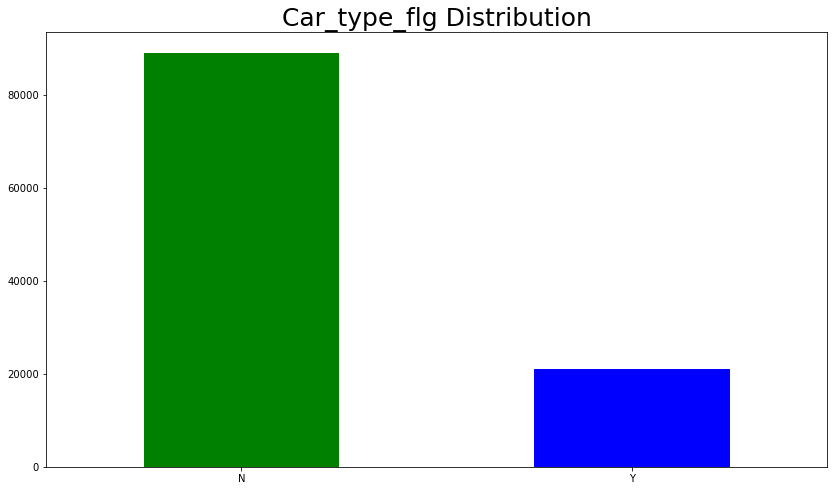

In [14]:
# exploring the 'car_type_flg' variable
plt.figure(figsize=(14,8))
plt.title('Car_type_flg Distribution',fontsize=25)
train_df['car_type_flg'].value_counts().plot(kind='bar',rot=0,color={'blue','green'})
plt.show()

Majority of the customers don't have a foreign car.

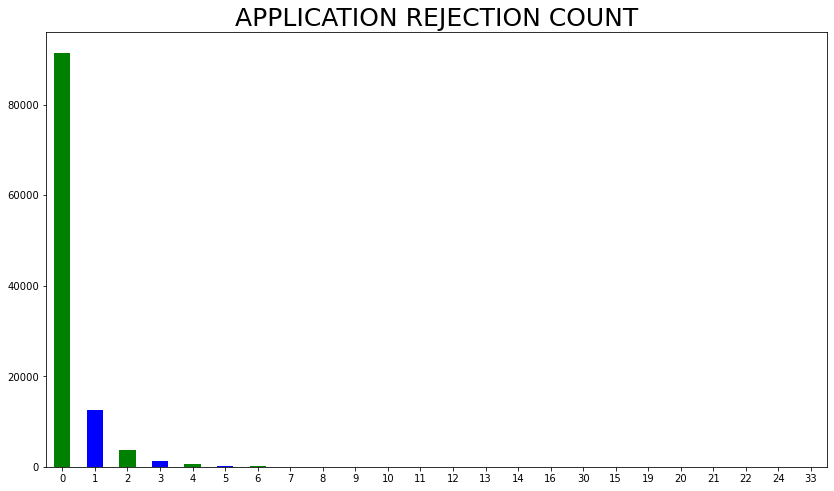

In [15]:
# exploring the 'appl_rej_cnt' variable
plt.figure(figsize=(14,8))
plt.title('APPLICATION REJECTION COUNT',fontsize=25)
train_df['appl_rej_cnt'].value_counts().plot(kind='bar',rot=0,color={'blue','green'})
plt.show()

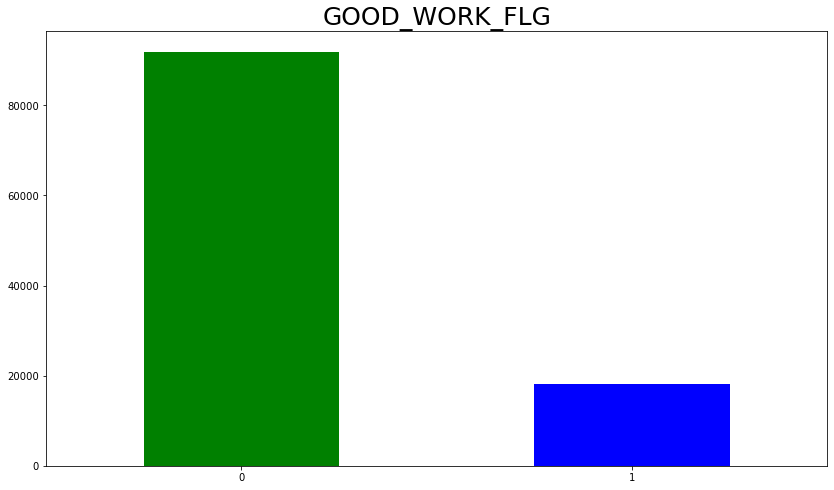

In [16]:
# exploring the 'good_work_flg' variable
plt.figure(figsize=(14,8))
plt.title('GOOD_WORK_FLG',fontsize=25)
train_df['good_work_flg'].value_counts().plot(kind='bar',rot=0,color={'blue','green'})
plt.show()

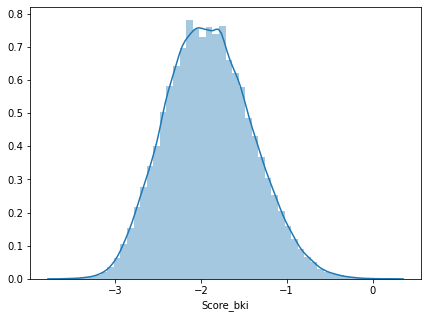

In [17]:
# plot the distribution of 'Score_bki'
sns.distplot(train_df['Score_bki'])

This variable displays a normal distribution.

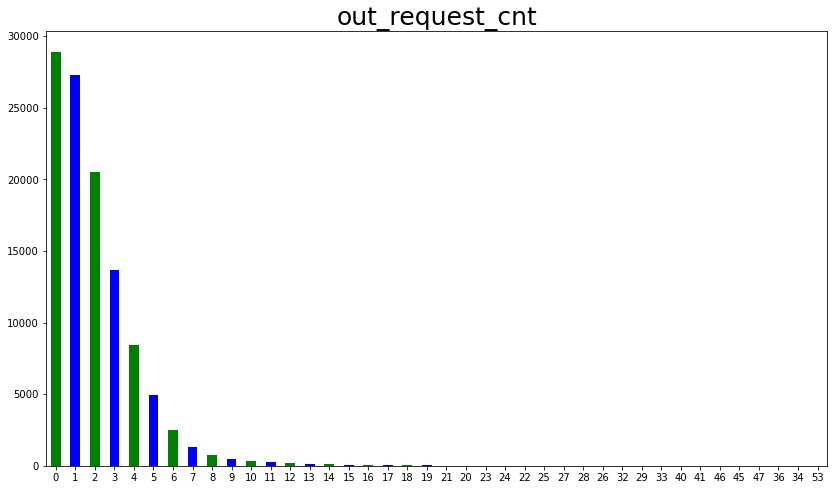

In [18]:
# exploring the 'out_request_cnt' variable
plt.figure(figsize=(14,8))
plt.title('out_request_cnt',fontsize=25)
train_df['out_request_cnt'].value_counts().plot(kind='bar',rot=0,color={'blue','green'})
plt.show()

These variables are skewed to the right

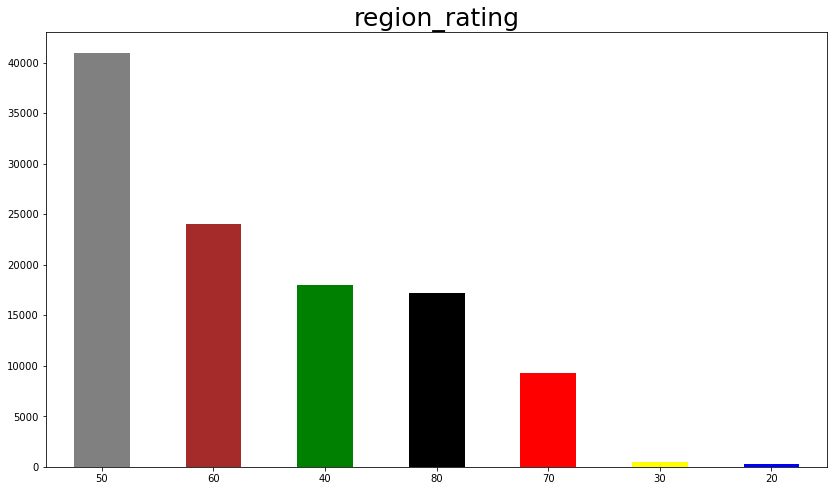

In [19]:
# exploring the 'region_rating' variable
plt.figure(figsize=(14,8))
plt.title('region_rating',fontsize=25)
train_df['region_rating'].value_counts().plot(kind='bar',rot=0,color={'blue','green','yellow','brown','red','black','grey'})
plt.show()

Majority of the customers are from the region/regions with a rating of 50.

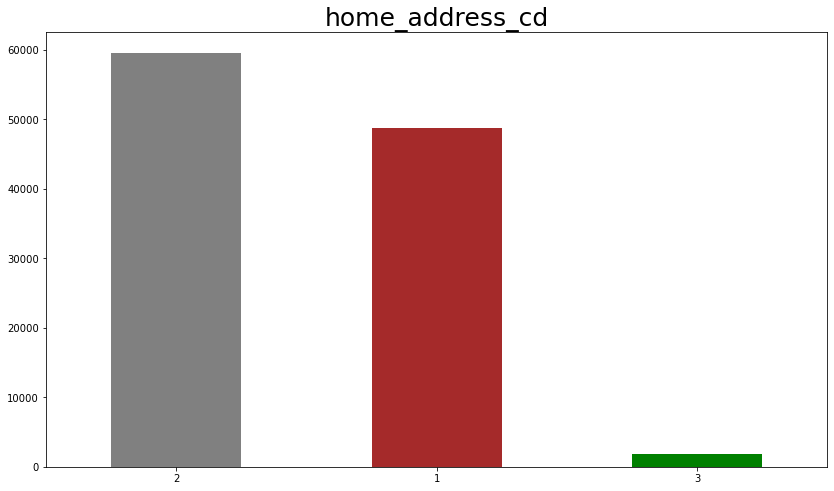

In [20]:
# exploring the 'home_address_cd' variable
plt.figure(figsize=(14,8))
plt.title('home_address_cd',fontsize=25)
train_df['home_address_cd'].value_counts().plot(kind='bar',rot=0,color={'blue','green','yellow','brown','red','black','grey'})
plt.show()

Majority of the customers are in home address category 2

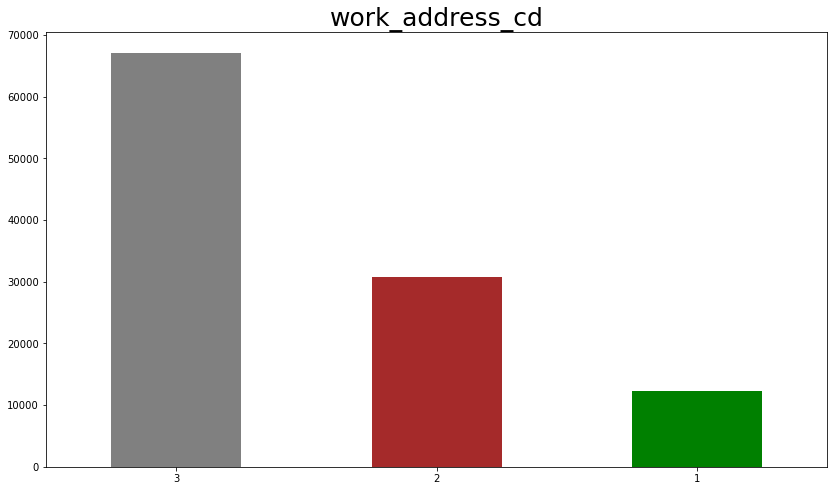

In [21]:
# exploring the 'work_address_cd' variable
plt.figure(figsize=(14,8))
plt.title('work_address_cd',fontsize=25)
train_df['work_address_cd'].value_counts().plot(kind='bar',rot=0,color={'blue','green','yellow','brown','red','black','grey'})
plt.show()

Majority of the customers are of work address category 3

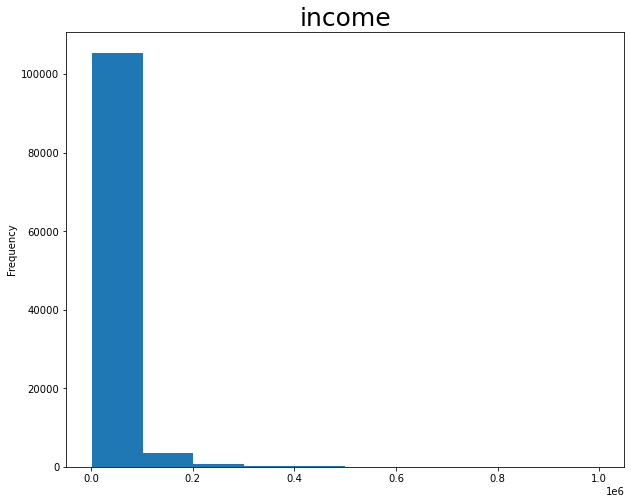

In [22]:
# histogram of the 'income' variable
plt.figure(figsize=(10,8))
plt.title('income',fontsize=25)
train_df['income'].plot(kind='hist')
plt.show()

The income variable is strongly skewed to the right.

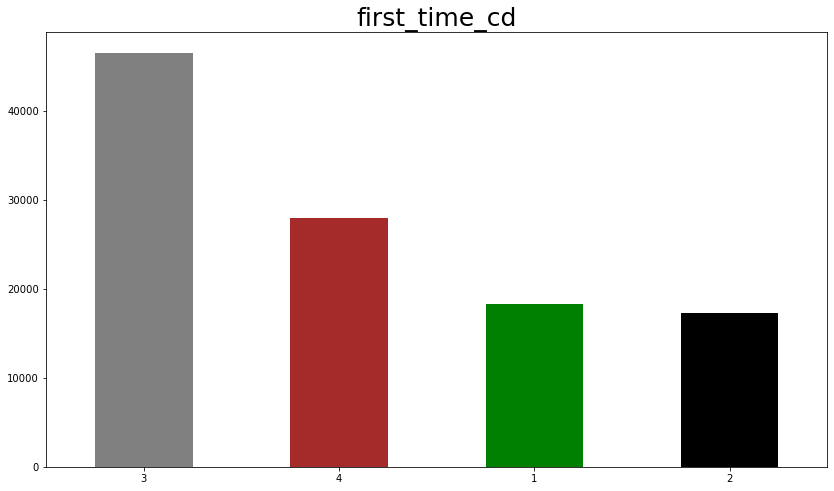

In [23]:
# exploring the 'first_time_cd' variable
plt.figure(figsize=(14,8))
plt.title('first_time_cd',fontsize=25)
train_df['first_time_cd'].value_counts().plot(kind='bar',rot=0,color={'blue','green','yellow','brown','red','black','grey'})
plt.show()

Majority of the customers are associated with prescription code 3.

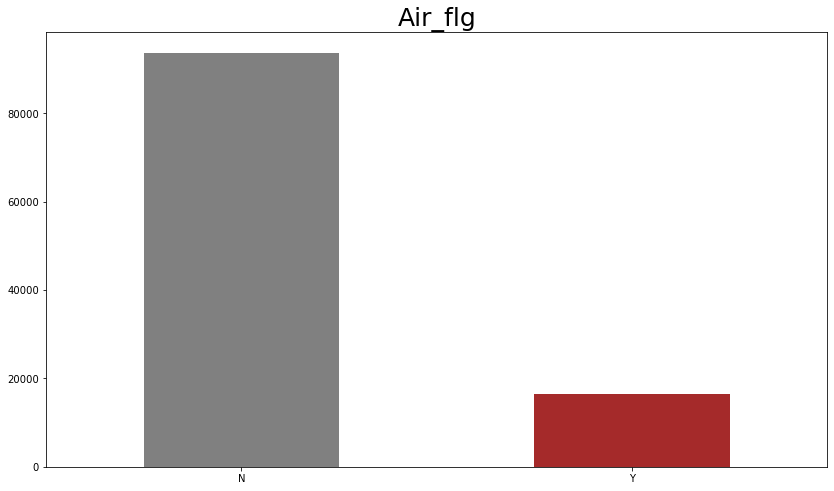

In [24]:
# exploring the 'Air_flg' variable
plt.figure(figsize=(14,8))
plt.title('Air_flg',fontsize=25)
train_df['Air_flg'].value_counts().plot(kind='bar',rot=0,color={'blue','green','yellow','brown','red','black','grey'})
plt.show()

Majority of the customers didn't have passports.

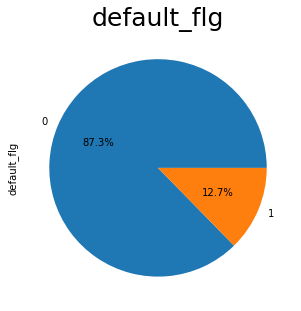

In [25]:
# exploring the 'default_flg' variable

plt.title('default_flg',fontsize=25)
train_df['default_flg'].value_counts().plot(kind='pie',autopct = '%0.1f%%')
plt.show()


A huge majority of the customers did not default compared to those who did

## 3.2 Bivariate Analysis

We will investigate how the target variable relates to the other variables.

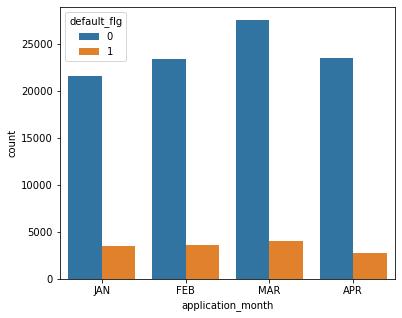

In [26]:
# default_flg by application_month
plt.figure(figsize = (6, 5))
sns.countplot('application_month', hue = 'default_flg', data =train_df);

March reported slightly higher instances of people defaulting while April reported the lowest.

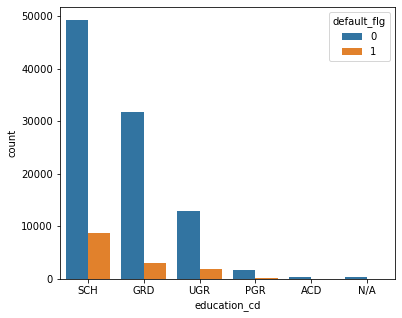

In [27]:
# default_flg by education_cd
plt.figure(figsize = (6, 5))
sns.countplot('education_cd', hue = 'default_flg', data =train_df);

SCH education level indicates higher default chances of customers while ACD has lowest default.

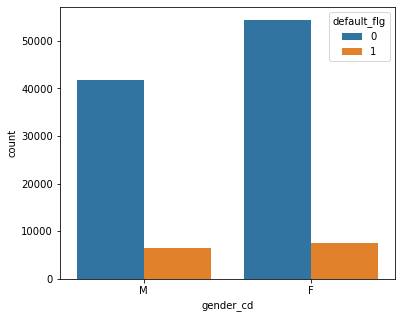

In [28]:
# default_flg by gender_cd
plt.figure(figsize = (6, 5))
sns.countplot('gender_cd', hue = 'default_flg', data =train_df);

Female gender has slightly higher defaulting chance compared to male gender.

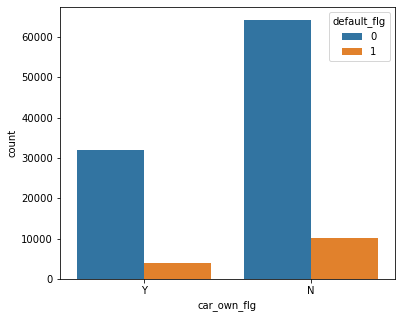

In [29]:
# default_flg by car_own_flg
plt.figure(figsize = (6, 5))
sns.countplot('car_own_flg', hue = 'default_flg', data =train_df);

Those without cars defaulted more than those with cars.Though the number of customers without cars outnumbers highly those with cars.

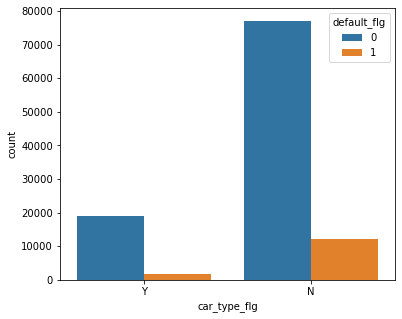

In [30]:
# default_flg by car_type_flg
plt.figure(figsize = (6, 5))
sns.countplot('car_type_flg', hue = 'default_flg', data =train_df);

Those without  foreign cars defaulted more than those with  foreign cars.

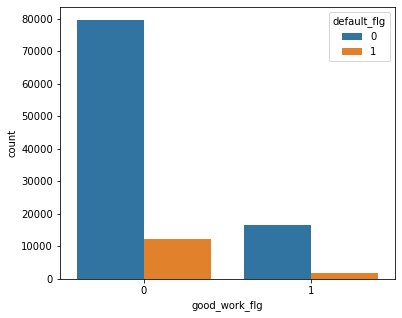

In [31]:
# default_flg by good_work_flg
plt.figure(figsize = (6, 5))
sns.countplot('good_work_flg', hue = 'default_flg', data =train_df);

Those who didnt have good work fl defaulted more than those with good work flg.

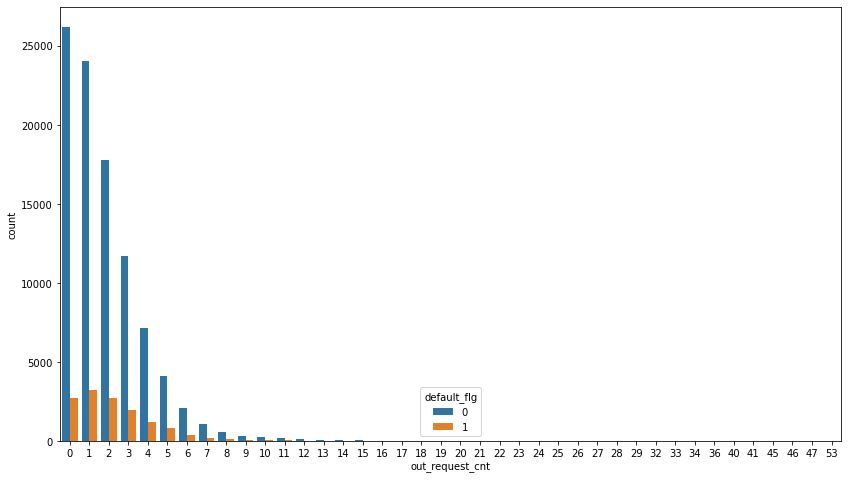

In [32]:
# default_flg by out_request_cnt
plt.figure(figsize = (14, 8))
sns.countplot('out_request_cnt', hue = 'default_flg', data =train_df);

Those with one number of requests in the bureau defaulted more than the others.

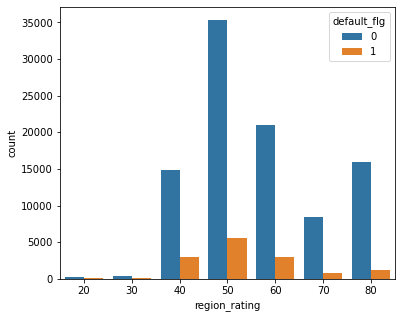

In [33]:
# default_flg by region_rating
plt.figure(figsize = (6, 5))
sns.countplot('region_rating', hue = 'default_flg', data =train_df);

The region rating 50 defaulted more times than others.

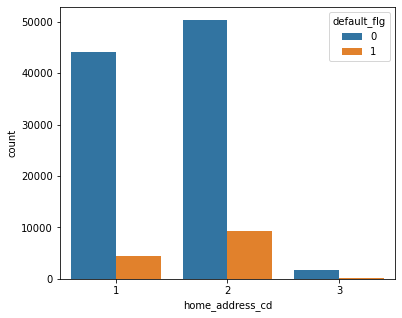

In [34]:
# default_flg by home_address_cd
plt.figure(figsize = (6, 5))
sns.countplot('home_address_cd', hue = 'default_flg', data =train_df);

Home address 2 defaulted more than other addresses i.e 1 and 2

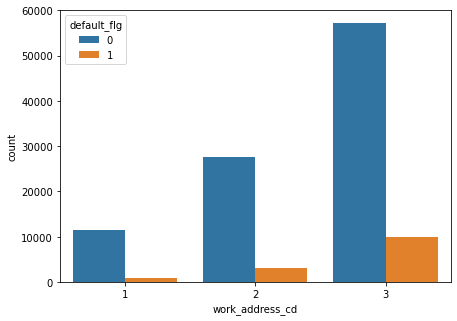

In [35]:
# default_flg by work_address_cd
sns.countplot(x = 'work_address_cd', hue = 'default_flg', data = train_df)
plt.show()

work_address 3 defaulted more than 2 and 1.

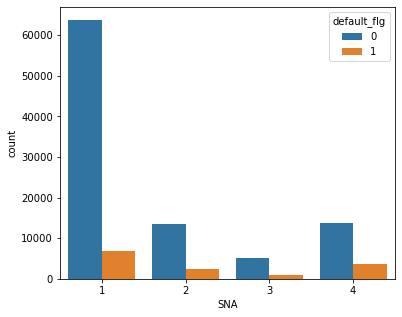

In [36]:
# default_flg by SNA
plt.figure(figsize = (6, 5))
sns.countplot('SNA', hue = 'default_flg', data =train_df);

SNA 1 defaulted more than others.

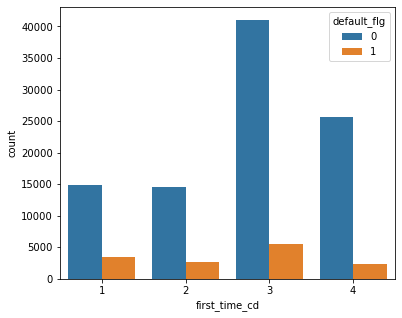

In [37]:
# default_flg by first_time_cd
plt.figure(figsize = (6, 5))
sns.countplot('first_time_cd', hue = 'default_flg', data =train_df);

first_timers 3 defaulted more than others 1,2,4.

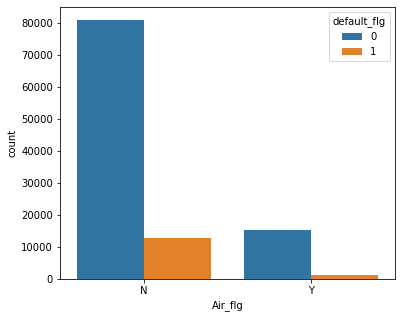

In [38]:
# default_flg by Air_flg
plt.figure(figsize = (6, 5))
sns.countplot('Air_flg', hue = 'default_flg', data =train_df);

Those who  do not travel by air defaulted more than those who used Air_flg

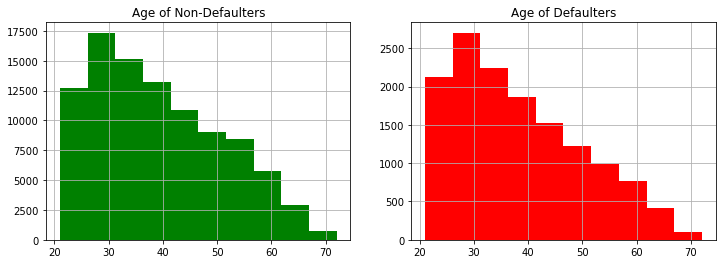

In [39]:
# default_flg by age
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

# age when default_flg is 0
plt.subplot(1, 2, 1)
train_df.loc[train_df.default_flg == 0].age.hist(color = 'green')
plt.title("Age of Non-Defaulters")

# age when default_flg = 1
plt.subplot(1, 2, 2)
train_df.loc[train_df.default_flg == 1].age.hist(color = 'red')
plt.title("Age of Defaulters")

plt.show()

There doesn't seem to be a significant difference in the age of those who defaulted and that of those who didn't

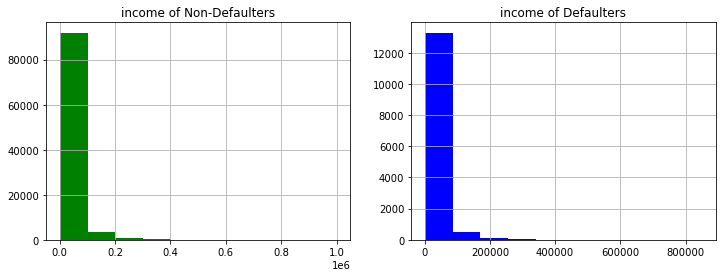

In [40]:
# default_flg by income
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

# income when default_flg is 0

plt.subplot(1, 2, 1)
train_df.loc[train_df.default_flg == 0].income.hist(color = 'green')
plt.title("income of Non-Defaulters")


# income when default_flg is 1
plt.subplot(1, 2, 2)
train_df.loc[train_df.default_flg == 1].income.hist(color = 'blue')
plt.title("income of Defaulters")


plt.show()

There doesn't seem to be a significant difference in the income of those who defaulted and that of those who didn't

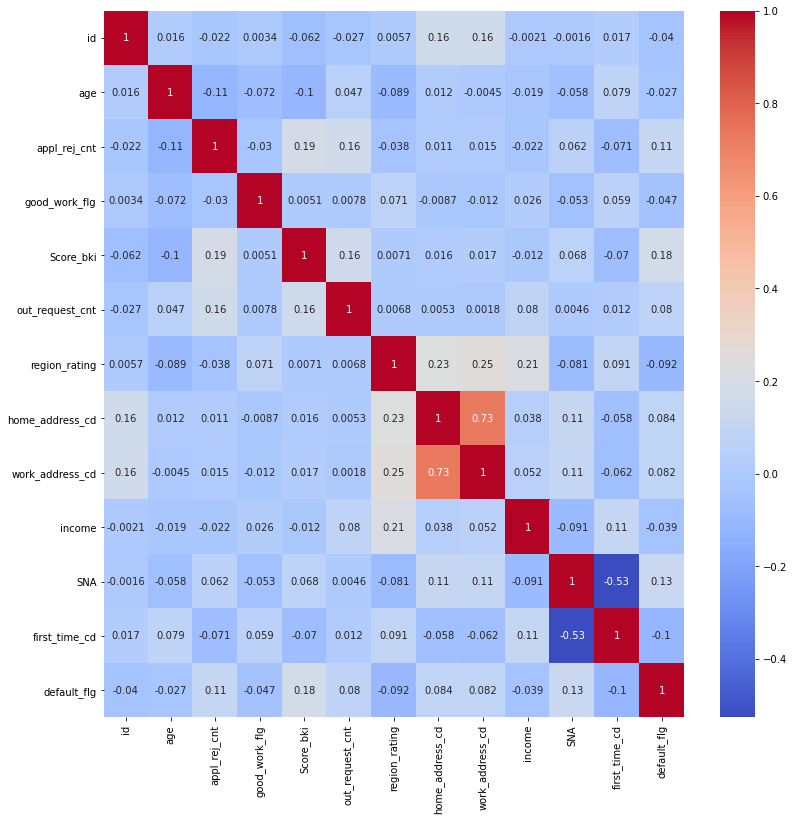

In [41]:
# creating a heatmap of the correlations between the variables
plt.figure(figsize=(13,13))
sns.heatmap(train_df.corr(),annot=True,cmap = 'coolwarm')

**Observations.** :Correlation close to 1 is a strong correlation ,while correlation close to -1 is a weak relationship and correlation equal to zero is no relationship.

 'home_address_cd' and 'work_address_cd' are highly correlated with each other while 'first_time_cd' and 'SNA' are inversely correlated with each other.

## 3.3 Feature Engineering

In [47]:
#train_df=train_df.set_index('id')
#train_df

In [ ]:
# binning our numerical variables
# binning age
# we bin by defining the intervals and categories
interval = (18, 25, 35, 60,90)
categories = ['student', 'youth', 'adult', 'senior']
train_df["age"] = pd.cut(train_df.age, interval, labels = categories)

# binning Score_bki
train_df["Score_bki"]=pd.qcut(train_df["Score_bki"],q=4)

# binning income
train_df["income"]=pd.qcut(train_df["income"],q=10)

In [44]:
# encode 'application_month' 
def encode_month(month):
    if month == 'JAN':
        month = 1
    elif month == 'FEB':
        month = 2
    elif month == 'MAR':
        month = 3
    elif month == 'APR':
        month = 4
    return month

train_df['application_month'] = train_df['application_month'].apply(lambda x : encode_month(x))
train_df.sample(3)

,application_day,application_month,education_cd,gender_cd,age,car_own_flg,car_type_flg,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,Air_flg,default_flg
id,,,,,,,,,,,,,,,,,,,
27661,03,2,GRD,F,31,Y,N,0,0,-1.920458,5,20,2,3,23000,4,3,N,0
48228,25,2,SCH,F,58,N,N,0,0,-2.670717,0,30,1,2,19000,1,3,N,0
67332,16,3,UGR,F,30,N,N,0,0,-1.260069,1,80,2,3,34000,1,3,Y,0


In [ ]:
# set application_day and application_month to category dtype
train_df['application_day'] = train_df['application_day'].astype('category')
train_df['application_month'] = train_df['application_month'].astype('category')


In [ ]:
# creating dummy variables of our categorical variables via one hot encoding
# encoding education_cd
train_df = train_df.merge(pd.get_dummies(train_df.education_cd, drop_first = True, prefix = 'education_cd'), left_index = True, 
                    right_index = True)

# encoding gender_cd
train_df = train_df.merge(pd.get_dummies(train_df.gender_cd, drop_first = True, prefix = 'gender_cd'), left_index = True, 
                    right_index = True)

# encoding car_own_flg

train_df = train_df.merge(pd.get_dummies(train_df.car_own_flg, drop_first = True, prefix = 'car_own_flg'), left_index = True, 
                    right_index = True)
# encoding car_type_flg
train_df = train_df.merge(pd.get_dummies(train_df.car_type_flg, drop_first = True, prefix = 'car_type_flg'), left_index = True, 
                    right_index = True)

# encoding Air_flg
train_df = train_df.merge(pd.get_dummies(train_df.Air_flg, drop_first = True, prefix = 'Air_flg'), left_index = True, 
                    right_index = True)

# encoding age
train_df = train_df.merge(pd.get_dummies(train_df.age, drop_first = True, prefix = 'age'), left_index = True, 
                    right_index = True)

# encoding Score_bki

train_df = train_df.merge(pd.get_dummies(train_df.Score_bki, drop_first = True, prefix = 'Score_bki'), left_index = True, 
                    right_index = True)
# encoding income
train_df = train_df.merge(pd.get_dummies(train_df.income, drop_first = True, prefix = 'income'), left_index = True, 
                    right_index = True)

# dropping the unneeded columns
train_df=train_df.drop(columns=['income','Score_bki','age','gender_cd','Air_flg','car_type_flg','car_own_flg','education_cd'],axis=1)

In [ ]:
train_df=pd.get_dummies(train_df)

In [ ]:
train_df

# 4. Modeling

In [ ]:
# splitting into features(X) and target(y)
X=train_df.drop(columns=['default_flg'])
y=train_df.default_flg

# scaling our features
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#scaled=StandardScaler().fit_transform(X)
from sklearn.preprocessing import MinMaxScaler
X_sc = MinMaxScaler().fit_transform(X)

# splitting into training and test sets 80-20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_sc,y,test_size=0.2,random_state=5,stratify = y)

# creating a balanced dataset
from imblearn.over_sampling import SMOTE
smt=SMOTE()
X_train,y_train=smt.fit_sample(X_train,y_train)

# we check the amount of records in each category
np.bincount(y_train)

In [45]:
#train_df.to_csv('train.csv',index=False)

In [ ]:
# implementing logistic regression
from sklearn.linear_model import LogisticRegression
logistic_classifier=LogisticRegression(solver='saga')
logistic_classifier.fit(X_train,y_train)

y_predict=logistic_classifier.predict(X_test)
print('y_predict is:',y_predict)
# evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("accuracy_score:")
print(accuracy_score(y_predict,y_test))
print("Confusion matrix:")
print(confusion_matrix(y_predict,y_test))
print("Classification report:")
print(classification_report(y_predict,y_test))

From our confusion matrix, we can see that 1845  records with the class 1 were predicted correctly, however 948 records with the class 1 were incorrectly predicted. 12902 records with the class 0 were predicted correctly while 6335 records were predicted incorrectly.

In [ ]:
# cross-validating the model
from sklearn.model_selection import cross_val_score
predicted = cross_val_score(logistic_classifier, X_sc, y, cv = 10)
print("Accuracy: %0.2f (+/- %0.2f)" % (predicted.mean(), predicted.std() * 2))

In [ ]:
# plotting roc curve (receiving operating characteristic curve)
from sklearn.metrics import roc_curve, roc_auc_score

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_predict, y_test)

# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# print the ROC - AUC score
print("ROC/AUC Score:",roc_auc_score(y_predict,y_test))

This type of curve shows the true positive and false positive rate for every probability threshold of a binary classifier. The higher the blue line, the better the model at distinguishing between the positive and negative classes.

## 4.1 Improving the Model

### 4.1.1 Hyperparameter Tuning

In [ ]:
# setting up a range of values for C to test
from sklearn.metrics import accuracy_score
C_params = [0.001,0.01,0.1,1,10,100, 1000, 10000, 100000]

for c in C_params:
    log = LogisticRegression(solver = 'saga', C = c)
    log.fit(X_train, y_train)
    log_pred = log.predict(X_test)
    print("When C = {}, accuracy = {}".format(c, accuracy_score(log_pred, y_test)))

**Observations:** We see that model performance increases significantly until c=1 from where increase ceases to be significant.

### 4.1.2 Feature Selection

In [ ]:
# finding the optimal number of features using Recursive Feature Elimination with Cross Validation (RFECV)
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

log = LogisticRegression(solver = 'saga')
rfecv = RFECV(estimator = log, step = 1, cv = StratifiedKFold(10), scoring = 'accuracy')
rfecv.fit(X_sc, y)
print('Optimal number of features: {}'.format(rfecv.n_features_))

In [ ]:
# getting the best features
indices = np.where(rfecv.support_ == True)
best_features = []

for index in indices:
    best_features.append(X.columns[index])
    
best_features

In [ ]:
# working with these selected features
X_df = train_df[best_features[0]]
y_df = train_df['default_flg']

# scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_new=scaler.fit_transform(X_df)
# splitting into 80-20 training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_new,y_df,test_size=0.2,random_state=5,stratify = y)

# creating a balanced dataset
from imblearn.over_sampling import SMOTE
smt=SMOTE()
X_train,y_train=smt.fit_sample(X_train,y_train)

# implementing logistic regression
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(solver='saga')
logistic.fit(X_train,y_train)

y_predic=logistic.predict(X_test)

# evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("accuracy_score:")
print(accuracy_score(y_predic,y_test))
print("Confusion matrix:")
print(confusion_matrix(y_predic,y_test))
print("Classification report:")
print(classification_report(y_predic,y_test))

**What have you noticed?:** The accuracy decreases after feature selection.

In [ ]:
# test with various values of C
for c in C_params:
    logreg = LogisticRegression(solver = 'saga', C = c, random_state = 5)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    print("When C = {}, accuracy = {}".format(c, accuracy_score(y_pred, y_test)))

In [ ]:
# plotting roc curve (receiving operating characteristic curve)
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate,true_positive_rate,threshold=roc_curve(y_pred,y_test)

# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# print the ROC - AUC score
print('ROC/AUC SCORE :',roc_auc_score(y_pred,y_test))

**Observation**: The situation is becoming worse!!model is weak

## 4.2 Alternate Models

### 4.2.1 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = train_df.drop(columns = ['default_flg'])
y = train_df.default_flg

X_sc = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.2, random_state = 5, stratify = y)

smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(dtc_pred, y_test))
print()
print("Classification report:")
print(classification_report(dtc_pred, y_test))

In [ ]:
# plotting roc curve (receiving operating characteristic curve)
false_positive_rate, true_positive_rate, threshold = roc_curve(dtc_pred, y_test)

# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC/AUC Score:", roc_auc_score(dtc_pred, y_test))

### 4.2.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = train_df.drop(columns = ['default_flg'])
y = train_df.default_flg

X_sc = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.2, random_state = 5, stratify = y)

smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print("accuracy_score:")
print(accuracy_score(rfc_pred,y_test))
print("Confusion matrix:")
print(confusion_matrix(rfc_pred, y_test))
print()
print("Classification report:")
print(classification_report(rfc_pred, y_test))

In [ ]:
# plotting roc curve (receiving operating characteristic curve)
false_positive_rate, true_positive_rate, threshold = roc_curve(rfc_pred, y_test)

# Plot ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("ROC/AUC Score:", roc_auc_score(rfc_pred, y_test))

# 5. Summary and Recommendations

Summarize your findings and provide recommendations based on them.

**A customer is more likely to default if:**

 -IF a customer applies a loan in the month of 'March'.
 
 -if a customer is in 'SCH'education level.
 
 -car_own_flg='N'
 
 -car_type_flg='N'
 
 -good_work_flg=0
 
 -out_request_cnt=1
 
 -region_rating=50
 
 -home_address_cd=2
 
 -work_address_cd=3
 
 -SNA=1
 
 -first_time_cd=3
 
 -Air_flg='N'
 
 
**A customer is more likely to NOT TO default if:**

  -IF a customer applies a loan in the month of 'April'.
 
  
  -if a customer is in 'PGR'  and 'ACD' education level.
 
  -car_own_flg='Y'
 
  -car_type_flg='Y'
 
  -good_work_flg=1
 
  -out_request_cnt=10,11,12,15,...
 
  -region_rating=20 OR 30
 
  -home_address_cd=3
 
  -work_address_cd=1
 
  -SNA=3
 
  -first_time_cd=4
 
  -Air_flg='Y'
  
**The following variables could not determine if a customer will default or not:**

                -age
                -gender
                -income
             
   
   

Working with the dataset above and torturing it in above data analysis and modelling we can see that Logistic regression model is not right for this dataset looking at the accuracy.RandomForest performs way better than logistic.

To improve the model accuracy we should try  do more Hyperparameter Tuning ,tuning hyperparameters more.

if explainability isn't a huge bit factor to take into consideration then the Random Forest model can be considered.

# 6. Challenging your Solution

### a) Did we have the right question?
yes.


### b) Did we have the right data?
yes.


### c) What can be done to improve the solution?
Performing hyperparameter tuning, feature engineering techniques i.e. PCA. We can also experiment with other advanced machine learning techinques such as boosting and bagging.
